#  Map Placement for City of Toronto Wayfinding Project

 ---[HackOn(Data)](http://hackondata.com/) Contest Challenge, Sep 10-11, 2016

Qian(John) Xie, Roland Sing, and Mingfei Cao

**[HackOnData](http://hackondata.com/)** is a free two-day event that brings together the Toronto data community to take a closer look at the data that touches our daily lives. Teams of Toronto's top data scientists and data engineers collaborated to generate practical insights from data provided by local companies, not-for profits and the government. Prior to the event, weekly workshops and challenges will help prepare participants by giving them the knowledge and hands-on experience required to ensure they can meaningfully participate. During the event, well-known mentors from Toronto and around the world engaged with participants to take their knowledge and skill to the next level. HackOn(Data) is the best platform available to local data talent and businesses to meet, collaborate, and exchange knowledge, experience and job opportunities!

**Sponsers**  
TranQuant, flipp, wattpad, LoyaltyOne, amazon, Lightbend, GuruLink, Shopify

** Partners**  
Toronto Apache Spark, scalator, Deep Learning Toronto, HackerNest, HacherNest Toronto Tech Socials, TechToronto, DMZ, City of Toronto, Toronto Public Library

## Contents

[1 Introduction](#1)
  * [1.1 Background and Motivation](#1.1)
  * [1.2 Our Approach](#1.2)
  * [1.3 Overview of Solution Process](#1.3)
  * [1.4 Python Packages](#1.4)

[2 Data](#2)
  * [2.1 Pedestrian and Vehicle Volume Data of Major Intersections](#2.1)
  * [2.2 Cultural Facility Data](#2.2)

[3 Expoloratory Data Analysis](#3)
  * [3.1 Intersections and Cultural Facilities Distribution Plot](#3.1)
  * [3.2 Clustering Facilities Using DBSCAN Algorithm](#3.2)
  * [3.3 Clustering Facilities Using KMeans Algorithm](#3.3)

[4 Map Placement Based on Facility Clustering](#4)
  * [4.1 Only Consider Distance](#4.1)
  * [4.2 Consider Distance and Pedestrian Volume](#4.2)

[5 Future Improvement](#5)

## 1. Introduction
<a id = '1'></a>

### 1.1 Background and Motivation
<a id = '1.1'></a>

In 2011, City of Toronto launched the TO360 Wayfinding Project. The integrated multi-modal wayfinding strategy is comprised of pedestrian, vehicular, cyclying and transit wayfinding. The project is aimed to:
* Enhance the overall image of Tornto as a destination
* Increase visitors at key attractions, spending in the Greater Toronto Area, boost the local econnomy
* Increase confidence to walk, reduce walk times, promote multi-modal transit and reduce auto use
* Improve urban realm, sense of community, pedestrian safety, health and environment

The project is implemented in three phases:  
* Phase 1: Wayfinding strategies (2011 - 2012)
* Phase 2: Pilot implementation  (2014 - 2015)
* Phase 3: City-wide roll out   (2016 - 2017)

Right now, the project in in phase 3. In determining where wayfinding products are required, a number of factors were considered:

**Existing Need** - The implementation strategy prioritizes areas where a need for wayfinding currently exists based on:  
* having high densities of visitors who are unfamiliar with the city
* having high pedestrian volumnes
* having changes in mode of travel
* being on a main street
* being an area that is difficult to navigate
* being close to hospitals, colleges or universities
* being close to a city centre

** Available Funding** - Further, certain areas may be prioritized as project partners come forward with funding to implement the schem.  Potential project partners include:  
* transit agencies
* Business Improvment Areas
* universities and health care campuses
* attractions
* city divisions
* tourism organizations

For the **HackOn(Data)** event, City of Toronto have an interest in exploring a more data-driven methodology to determine the timing and geographic distribution of the required TO360 map assest upgrades. The data-driven methodology may help gain valuable insights from a different and novel perspective and help domain experts to make more effective and reliable map placement plan.

**Reference**: [Toronto Wayfinding Strategy](http://www1.toronto.ca/wps/portal/contentonly?vgnextoid=8057524d63f02410VgnVCM10000071d60f89RCRD&vgnextchannel=d90d4074781e1410VgnVCM10000071d60f89RCRD)


### 1.2 Our Approach
<a id = '1.2'></a>
We choose an expoloratory approach for this problem. We are not aiming to find a "perfect" solution by considering all needs and using all the available data. Instead, our goal is to build a prototype model using the a few of the most important data sources(provided by [TranQuant](http://tranquant.com/) and [City of Toronto Open Data](http://www1.toronto.ca/wps/portal/contentonly?vgnextoid=9e56e03bb8d1e310VgnVCM10000071d60f89RCRD)). If we can gain insights from the solution and the methodology is actionable, we can refine the prototype methodology by taking into consideration more needs, incooporating more data sources, and using more advanced algorithms.

Among the four aspects of the multi-modal wayfinding strategy, we focus on the **pedestrian wayfinding**. We chose to analyze two datasets from the City of Toronto, available on TranQuant:  
* Cultural Spaces: This dataset is a compilation of all spaces within the 44 City wards that were available for cultural use for a five year period.
* Signalized Intersection Traffic and Pedestrians: This dataset contains traffic and pedestrian volume data collected at intersections where there are traffic signals from 1999 to 2015.


### 1.3 Overview of Solution Process
<a id = '1.3'></a>
Aftering deciding to use the above two datasets, the study began with a single question: what criteria should we consider when choosing an intersection to place map?

In the begining, we considered the problem as an optimization problem. After some discussion, we decided this direction is possible but might be difficult to implement in a two-day contest. Then we did some exploratory data analysis by plotting the intersections and facilities geographic distribution on map. After seeing the plot, we thought clustering is a direction we should try. The logic is as follows: 

1. Clustering the facilites into small groups according to their geographic distance
2. Find the geographic coordinates of each facility cluster centroid
3. Select the closest three intersections to a facility cluster centroid
4. Among the closest three intersections, choose the intersection with the highest pedestrian volume

The logic is heuristic but simple and easy to implement, so we managed to build a solution based on this logic within the two day time limit. 

I tried two clustering algorithms: DBSCAN and KMeans. DBSCAN is density-based clustering while KMeans is centroid-based clustering

At this stage, I adopted KMeans algorithm. KMeans works better to spatially evenly divide our facilities into clusters according to their geographic coordinates. DBSCAN can provide another perspective of looking at the problem and we can explore that angle in the future.


### 1.4 Python Packages
<a id = '1.4'></a>
* Numpy
* Scipy
* Pandas
* Matplotlib
* scikit-learn
* seaborn
* folium

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns
import folium
from folium import plugins
from sklearn.cluster import DBSCAN, KMeans
from sklearn import metrics
from scipy import spatial
import time
%matplotlib inline
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

## 2. Data Preparation
<a id = '2'></a>
* Pedestrian and Vehicle Volume Data of Major Intersections
  - `ped_vol_2012.csv`: pedestrian and vehicle volume data collected at some intersections in 2012 
  - `ped_vol_2013.csv`: pedestrian and vehicle volume data collected at some intersections in 2013
  - `ped_vol_2014.csv`: pedestrian and vehicle volume data collected at some intersections in 2014
  - `ped_vol_2015.csv`: pedestrian and vehicle volume data collected at some intersections in 2015
  - `signalizedTrafficPedestrianVolumes` - pedestrian and vehicle volume data collected at some intersections from 1999 - 2012



* Cultural Facility Data  
  The same data was provided in three formats
  - `MSFC_44_Wards_Complete_Final.csv`: List of cultural facilities in Toronto. The file consists of the name of the facility, address, ward information, ownership of facilities that are available on a rental basis for cultural events. The two accompanying documents `MSFC_Readme_1.csv` and `MSFC_Readme_2.csv` give detailed describe the contents of the file and the schema(columns) of the file. The `MSFC_44_Wards_Complete_Final.csv` only provides postal code, no coordinates for facility. 
  
  - `Make_space_for_culture_mtm3.zip`:  with shape files of MTM 3 coordinate system and facility file `MAKE_SPACE_FOR_CULTURE.dbf`, which contains coordinates for facilities. 
  - `Make_space_for_culture_wgs84.zip`: with shape files for WGS84 coordinate system and facility file `MAKE_SPACE_FOR_CULTURE_WGS84.dbf`, which contains coordinates for facilities.
  

### 2.1 Pedestrian and Vehicle Volume Data of Major Intersections
<a id = '2.1'></a>

In [2]:
# Data collected in 2012
intersection_2012_df = pd.read_csv("./Data/ped_vol_2012.csv", header=None,
                                   names=['PX', 'main', 'midblock_route', 'side1_route', 'side2_route', 'activation_date',
                                    'latitude', 'longitude', 'count_date', '8hr_vel_vol', '8hr_ped_vol'],
                                   skiprows=1)
intersection_2012_df.head()

PX         main midblock_route     side1_route side2_route activation_date   latitude  longitude count_date  8hr_vel_vol  8hr_ped_vol
0   4    JARVIS ST            NaN   ADELAIDE ST E         NaN     12-Sep-1958  43.651534 -79.372360  8/15/2012        19037         5679
1  14   BLOOR ST E            NaN  TED ROGERS WAY         NaN     28-Mar-1951  43.671577 -79.380520  5/31/2012        16991         7835
2  22    CHURCH ST            NaN    GERRARD ST E         NaN     18-Jul-1941  43.659858 -79.378522   9/5/2012        17164        14490
3  25   BLOOR ST E            NaN       CHURCH ST         NaN     19-Feb-1932  43.671022 -79.383123  5/30/2012        18894        26556
4  27  VICTORIA ST            NaN   RICHMOND ST E         NaN     03-Nov-1927  43.651952 -79.377756  7/10/2012        12770         6969

In [3]:
# check to make sure data types are correct
intersection_2012_df.dtypes

PX                   int64
main                object
midblock_route      object
side1_route         object
side2_route         object
activation_date     object
latitude           float64
longitude          float64
count_date          object
8hr_vel_vol          int64
8hr_ped_vol          int64
dtype: object

In [4]:
# check number of records
intersection_2012_df.shape

(468, 11)

In [5]:
# Data collected in 2013
intersection_2013_df = pd.read_csv("./Data/ped_vol_2013.csv",
                                   names=['PX', 'main', 'midblock_route', 'side1_route', 'side2_route', 'activation_date',
                                    'latitude', 'longitude', 'count_date', '8hr_vel_vol', '8hr_ped_vol'],
                                   skiprows=1)
intersection_2013_df.head()

PX               main midblock_route   side1_route side2_route activation_date   latitude  longitude count_date  8hr_vel_vol  8hr_ped_vol
0  13  MOUNT PLEASANT RD            NaN  CHARLES ST E   JARVIS ST     23-May-1950  43.669989 -79.379923  10/8/2013        15228         2269
1  23          CHURCH ST            NaN    CARLTON ST         NaN     17-Feb-1932  43.661871 -79.379335  6/26/2013        19901         9052
2  55           YONGE ST            NaN  LAWRENCE AVE         NaN     03-Jan-1941  43.725103 -79.402193  10/3/2013        29417         4196
3  81     UNIVERSITY AVE            NaN   DUNDAS ST W         NaN     28-Jun-1928  43.654812 -79.388484  8/14/2013        28831        18932
4  86          AVENUE RD            NaN    BLOOR ST W         NaN     21-Jul-1928  43.668685 -79.394119  5/27/2013        26039        14160

In [6]:
# check to make sure data types are correct
intersection_2013_df.dtypes

PX                   int64
main                object
midblock_route      object
side1_route         object
side2_route         object
activation_date     object
latitude           float64
longitude          float64
count_date          object
8hr_vel_vol          int64
8hr_ped_vol          int64
dtype: object

In [7]:
# check number of records
intersection_2013_df.shape

(295, 11)

In [8]:
# Data collected in 2014
intersection_2014_df = pd.read_csv("./Data/ped_vol_2014.csv",
                                   names=['PX', 'main', 'midblock_route', 'side1_route', 'side2_route', 'activation_date',
                                    'latitude', 'longitude', 'count_date', '8hr_vel_vol', '8hr_ped_vol'],
                                   skiprows=1)
intersection_2014_df.head()

PX      main midblock_route    side1_route side2_route activation_date   latitude  longitude count_date  8hr_vel_vol  8hr_ped_vol
0  29  YONGE ST            NaN       FRONT ST         NaN     24-Aug-1928  43.646846 -79.376931   5/6/2014        10737        17522
1  30  YONGE ST            NaN  WELLINGTON ST         NaN     06-Jan-1964  43.647848 -79.377351   5/6/2014        13620        26656
2  33  YONGE ST            NaN    RICHMOND ST         NaN     03-Nov-1927  43.651697 -79.378965   5/6/2014        12388        24487
3  34  YONGE ST            NaN       QUEEN ST         NaN     03-Nov-1927  43.652421 -79.379276   5/5/2014        12035        26437
4  35  YONGE ST            NaN      SHUTER ST         NaN     12-Mar-1959  43.654066 -79.379957  5/10/2014         7830        21137

In [9]:
# check to make sure data types are correct
intersection_2014_df.dtypes

PX                   int64
main                object
midblock_route      object
side1_route         object
side2_route         object
activation_date     object
latitude           float64
longitude          float64
count_date          object
8hr_vel_vol          int64
8hr_ped_vol          int64
dtype: object

In [10]:
# check number of records
intersection_2013_df.shape

(295, 11)

In [11]:
# Data collected in 2014
intersection_2015_df = pd.read_csv("./Data/ped_vol_2015.csv",
                                   names=['PX', 'main', 'midblock_route', 'side1_route', 'side2_route', 'activation_date',
                                    'latitude', 'longitude', 'count_date', '8hr_vel_vol', '8hr_ped_vol'],
                                   skiprows=1)
intersection_2015_df.head()

PX         main midblock_route  side1_route      side2_route activation_date   latitude  longitude count_date  8hr_vel_vol  8hr_ped_vol
0   8    JARVIS ST            NaN  DUNDAS ST E              NaN     21-Jun-1928  43.657052 -79.374531  4/13/2015        18207         7458
1  15    CHURCH ST            NaN   FRONT ST E  WELLINGTON ST E     24-Apr-1950  43.648513 -79.373834  4/20/2015        10467         7381
2  21  DUNDAS ST E            NaN    CHURCH ST              NaN     17-Dec-1952  43.656499 -79.377127  4/13/2015        13764        10302
3  31     YONGE ST            NaN      KING ST              NaN     03-Nov-1927  43.649162 -79.377904  1/22/2015        13527        33938
4  36     YONGE ST            NaN    DUNDAS ST              NaN     04-Apr-1927  43.656326 -79.380912  4/11/2015        10925        34615

In [12]:
# check to make sure data types are correct
intersection_2015_df.dtypes

PX                   int64
main                object
midblock_route      object
side1_route         object
side2_route         object
activation_date     object
latitude           float64
longitude          float64
count_date          object
8hr_vel_vol          int64
8hr_ped_vol          int64
dtype: object

In [13]:
# check number of records
intersection_2015_df.shape

(293, 11)

In [14]:
# Data collected in 1999-2012, in the signalizedTrafficPedestrianVolumes.csv file 
# note that in the signalizedTrafficPedestrianVolumes.csv file 
# the 8hr_vel_vol, 8hr_ped_vol, 24hr_vel_vol, and 24hr_ped_vol columns
# contains comma in the number for the thousands marker. So you need to use the 
# keyword parameter thousands ="," to correly read the table.
# otherwise those columns will be returned as object(string) columns
intersection_1999_2012_df1 = pd.read_csv("./Data/signalizedTrafficPedestrianVolumes.csv",
                            names=['PX', 'main', 'midblock_route', 'side1_route', 'side2_route', 
                                   'activation_date','latitude', 'longitude', 'count_date',
                                   '8hr_vel_vol', '8hr_ped_vol', '24hr_ped_vol', '24hr_veh_vol'],
                             skiprows=1, thousands=",")
intersection_1999_2012_df1.head()

PX       main midblock_route    side1_route side2_route activation_date   latitude  longitude count_date  8hr_vel_vol  8hr_ped_vol  24hr_ped_vol  24hr_veh_vol
0   2  JARVIS ST            NaN     FRONT ST E         NaN      11/15/1948  43.649450 -79.371410   9/8/2011        17008        19335         34016         38670
1   3  KING ST E            NaN      JARVIS ST         NaN       8/23/1950  43.650461 -79.371924   9/7/2011        37719        17665         75438         35330
2   4  JARVIS ST            NaN  ADELAIDE ST E         NaN       9/12/1958  43.651534 -79.372360  6/16/2008         1991        19726          3982         39452
3   5  JARVIS ST            NaN  RICHMOND ST E         NaN       4/21/1962  43.652718 -79.372824  7/30/2009         2696        24842          5392         49684
4   6  JARVIS ST            NaN     QUEEN ST E         NaN       8/24/1928  43.653704 -79.373238  5/18/2011         3622        19772          7244         39544

In [15]:
# check to make sure data types are correct
intersection_1999_2012_df1.dtypes

PX                   int64
main                object
midblock_route      object
side1_route         object
side2_route         object
activation_date     object
latitude           float64
longitude          float64
count_date          object
8hr_vel_vol          int64
8hr_ped_vol          int64
24hr_ped_vol         int64
24hr_veh_vol         int64
dtype: object

In [16]:
# check number of records
intersection_1999_2012_df1.shape

(2209, 13)

** Note**   
About `intersection_1999_2012_df` dataframe, if you look carefully, the `24hr_ped_vol` and `24hr_veh_vol` are just 2x `8hr_ped_vol` and 2x `8hr_veh_vol` respectively. They are redundant columns and can be dropped.

In [17]:
intersection_1999_2012_df=intersection_1999_2012_df1.drop(['24hr_ped_vol', '24hr_veh_vol'], axis = 1)
intersection_1999_2012_df.head()

PX       main midblock_route    side1_route side2_route activation_date   latitude  longitude count_date  8hr_vel_vol  8hr_ped_vol
0   2  JARVIS ST            NaN     FRONT ST E         NaN      11/15/1948  43.649450 -79.371410   9/8/2011        17008        19335
1   3  KING ST E            NaN      JARVIS ST         NaN       8/23/1950  43.650461 -79.371924   9/7/2011        37719        17665
2   4  JARVIS ST            NaN  ADELAIDE ST E         NaN       9/12/1958  43.651534 -79.372360  6/16/2008         1991        19726
3   5  JARVIS ST            NaN  RICHMOND ST E         NaN       4/21/1962  43.652718 -79.372824  7/30/2009         2696        24842
4   6  JARVIS ST            NaN     QUEEN ST E         NaN       8/24/1928  43.653704 -79.373238  5/18/2011         3622        19772

In [18]:
intersection_1999_2012_df1.dtypes

PX                   int64
main                object
midblock_route      object
side1_route         object
side2_route         object
activation_date     object
latitude           float64
longitude          float64
count_date          object
8hr_vel_vol          int64
8hr_ped_vol          int64
24hr_ped_vol         int64
24hr_veh_vol         int64
dtype: object

In [19]:
# check number of records
intersection_1999_2012_df.shape

(2209, 11)

#### Combine All Intersection Data into Single DataFrame

In [20]:
# check the total number of intersection records
total_intersection_records = (intersection_1999_2012_df.shape[0]+ intersection_2012_df.shape[0]
                              + intersection_2013_df.shape[0]+ intersection_2014_df.shape[0]
                              + intersection_2015_df.shape[0])
print total_intersection_records

3563


In [21]:
# combine all intersection data 
frames =[intersection_1999_2012_df, intersection_2012_df, 
         intersection_2013_df, intersection_2014_df,
         intersection_2015_df]
intersection_all_df = pd.concat(frames)
intersection_all_df.head()

PX       main midblock_route    side1_route side2_route activation_date   latitude  longitude count_date  8hr_vel_vol  8hr_ped_vol
0   2  JARVIS ST            NaN     FRONT ST E         NaN      11/15/1948  43.649450 -79.371410   9/8/2011        17008        19335
1   3  KING ST E            NaN      JARVIS ST         NaN       8/23/1950  43.650461 -79.371924   9/7/2011        37719        17665
2   4  JARVIS ST            NaN  ADELAIDE ST E         NaN       9/12/1958  43.651534 -79.372360  6/16/2008         1991        19726
3   5  JARVIS ST            NaN  RICHMOND ST E         NaN       4/21/1962  43.652718 -79.372824  7/30/2009         2696        24842
4   6  JARVIS ST            NaN     QUEEN ST E         NaN       8/24/1928  43.653704 -79.373238  5/18/2011         3622        19772

In [22]:
print total_intersection_records == intersection_all_df.shape[0]

True


In [23]:
# PX is a unique ID for an intersection, if we sort the combined dataframe by 'PX'
# We can see that some of the intersections have multiple records of pedestrian
# and vehicle volume data.
intersection_all_df.sort_values('PX')

PX               main midblock_route                 side1_route               side2_route activation_date   latitude  longitude  count_date  8hr_vel_vol  8hr_ped_vol
0        2          JARVIS ST            NaN                  FRONT ST E                       NaN      11/15/1948  43.649450 -79.371410    9/8/2011        17008        19335
1        3          KING ST E            NaN                   JARVIS ST                       NaN       8/23/1950  43.650461 -79.371924    9/7/2011        37719        17665
2        4          JARVIS ST            NaN               ADELAIDE ST E                       NaN       9/12/1958  43.651534 -79.372360   6/16/2008         1991        19726
0        4          JARVIS ST            NaN               ADELAIDE ST E                       NaN     12-Sep-1958  43.651534 -79.372360   8/15/2012        19037         5679
3        5          JARVIS ST            NaN               RICHMOND ST E                       NaN       4/21/1962  43.652718 -79.372824   7/30/2009         2696        24842
4        6          JARVIS ST            NaN                  QUEEN ST E                       NaN       8/24/1928  43.653704 -79.373238   5/18/2011         3622        19772
5        7          JARVIS ST            NaN                   SHUTER ST                       NaN      11/18/1948  43.655357 -79.373862   5/24/2011         1979        17492
6        8          JARVIS ST            NaN                 DUNDAS ST E                       NaN       6/21/1928  43.657052 -79.374531   5/18/2011         5651        20116
0        8          JARVIS ST            NaN                 DUNDAS ST E                       NaN     21-Jun-1928  43.657052 -79.374531   4/13/2015        18207         7458
7        9          JARVIS ST            NaN                GERRARD ST E                       NaN       7/14/1941  43.660432 -79.375854   5/18/2011         4284        19891
8       10          JARVIS ST            NaN                  CARLTON ST                       NaN       6/28/1928  43.662420 -79.376708   5/24/2011         4189        21040
9       11          JARVIS ST            NaN              WELLESLEY ST E                       NaN       9/28/1948  43.666289 -79.378325   5/24/2011         5001        21072
10      12          JARVIS ST            NaN                 ISABELLA ST                       NaN       9/13/1960  43.668869 -79.379416   5/18/2011         1679        15958
0       13  MOUNT PLEASANT RD            NaN                CHARLES ST E                 JARVIS ST     23-May-1950  43.669989 -79.379923   10/8/2013        15228         2269
11      13  MOUNT PLEASANT RD            NaN                CHARLES ST E                 JARVIS ST       5/23/1950  43.669989 -79.379923   5/24/2011         2094        20343
12      14         BLOOR ST E            NaN              TED ROGERS WAY                       NaN       3/28/1951  43.671577 -79.380520   12/8/2009         4426        15399
1       14         BLOOR ST E            NaN              TED ROGERS WAY                       NaN     28-Mar-1951  43.671577 -79.380520   5/31/2012        16991         7835
13      15          CHURCH ST            NaN                  FRONT ST E           WELLINGTON ST E       4/24/1950  43.648513 -79.373834   4/23/2009         8053        16666
1       15          CHURCH ST            NaN                  FRONT ST E           WELLINGTON ST E     24-Apr-1950  43.648513 -79.373834   4/20/2015        10467         7381
14      16          KING ST E            NaN                   CHURCH ST                       NaN       1/10/1928  43.649916 -79.374409   4/23/2009        11277        13419
15      17          CHURCH ST            NaN               ADELAIDE ST E                       NaN      11/22/1948  43.651173 -79.374925   7/27/2011         5765        12868
16      18          CHURCH ST            NaN               RICHMOND ST E                       NaN      11/22/1948  43.652441 -79.375448  11/19/2007         4

#### Average pedestrian and vehicle volume for intersections with multiple record
We only want unique intersections in the final dataframe, so we need to average the multiple records for a single intersection.

1. Create two dataframes from `intersection_ped_df` data frame.
2. The first dataframe contain colums `PX`, `main`, `midblock_route`, `side1_route`, `side2_route`, `latitude`, and `longitude`. Remove duplicates based on PX, so we have unique intersections.
3. Second dataframe contain columns `PX`,  average `8hr_vel_vol`,  and average `8hr_ped_vol`
4. Join the two dataframes by `PX`

In [24]:
# first dataframe 
unique_intersection_df = intersection_all_df[['PX', 'main', 'midblock_route', 'side1_route', 
                              'side2_route', 'latitude', 'longitude']].drop_duplicates('PX')

unique_intersection_df.count() #2256 unique intersections

PX                2256
main              2256
midblock_route     171
side1_route       2256
side2_route        766
latitude          2256
longitude         2256
dtype: int64

In [25]:
# seond dataframe
avg_ped_vel_df = intersection_all_df[['PX', '8hr_vel_vol', '8hr_ped_vol']].groupby('PX').mean()
avg_ped_vel_df.count()

8hr_vel_vol    2256
8hr_ped_vol    2256
dtype: int64

In [26]:
avg_ped_vel_df.head()

8hr_vel_vol  8hr_ped_vol
PX                          
2       17008.0      19335.0
3       37719.0      17665.0
4       10514.0      12702.5
5        2696.0      24842.0
6        3622.0      19772.0

In [27]:
# Join the two dataframes
# This dataframe will be the final dataframe for analysis use
intersection_ped_df = unique_intersection_df.join(avg_ped_vel_df, on='PX', how = 'inner')
intersection_ped_df.head()

PX       main midblock_route    side1_route side2_route   latitude  longitude  8hr_vel_vol  8hr_ped_vol
0   2  JARVIS ST            NaN     FRONT ST E         NaN  43.649450 -79.371410      17008.0      19335.0
1   3  KING ST E            NaN      JARVIS ST         NaN  43.650461 -79.371924      37719.0      17665.0
2   4  JARVIS ST            NaN  ADELAIDE ST E         NaN  43.651534 -79.372360      10514.0      12702.5
3   5  JARVIS ST            NaN  RICHMOND ST E         NaN  43.652718 -79.372824       2696.0      24842.0
4   6  JARVIS ST            NaN     QUEEN ST E         NaN  43.653704 -79.373238       3622.0      19772.0

In [28]:
intersection_ped_df.dtypes

PX                  int64
main               object
midblock_route     object
side1_route        object
side2_route        object
latitude          float64
longitude         float64
8hr_vel_vol       float64
8hr_ped_vol       float64
dtype: object

In [29]:
intersection_ped_df.shape

(2256, 9)

We have 2256 unique major intersections that have pedestrian and vehicle volume counted. We will select intersections from these ones to place map.

### 2.2 Cultural Facility Data
<a id = '2.2'></a>

#### Column Names of the Dataset
---
**ADD_NUM** = ADDRESS_NUMBER  (Street number)  
**LF_NAME** = LINEAR_NAME_FULL  (Street Name)  
**ADDRESS** = ADDRESS_FULL  (Full address)  
**POSTAL_CD** = POSTAL_CODE  (POSTAL CODE)  
**CITY** = CITY  
**X** = X  (Easting in MTM NAD27 3 degree Projection)  
**Y** = Y  (Northing in MTM NAD27 3 degree Projection)  
**LONGITUDE** = LONGITUDE  (LONGITUDE = Longitude in WGS84 Coordinate System)  
**LATITUDE** = LATITUDE  (Latitude in WGS84 Coordinate System)  
**FAC_NAM** = FACILITY_NAME  (FACILITY NAME)  
**STE_FLR_UN** = SUITE_FLOOR_UNIT  (SUITE FLOOR UNIT)  
**PERFRMANCE** = PERFORMANCE  (Spaces in which performing arts (dance, music, theatre, etc.) creation or presentation takes place)  
**EXHBVISARTT** = EXHIBITION_VISUAL_ARTS  (Spaces in which visual arts creation or presentation can take place, in addition to pure exhibition space.)  
**SCRN_BASED** = SCREEN_BASED  (Spaces for the production and presentation of multimedia screen-based arts including digital, )  
**LIBRARY** = LIBRARY  (Toronto Public Library facility with physical space for cultural activity)  
**MULTIPURP** = MULTIPURPOSE  (Spaces that are not purpose-built and can house a range of cultural activity across disciplines.)  
**HERITAGE** = HERITAGE  (Facilities where heritage activity takes place (historical societies, archives, community museums etc.)  
**OWNERSHIP** = OWNERSHIP  (OWNERSHIP)  
**OBJECTID** = OBJECTID  (Unique system identifier)  

In [30]:
# use lower case column names for facility dataframe
col_names = ['add_num', 'lf_name', 'address', 'postal_cd', 'city', 'x', 'y', 'longitude', 'latitude', 'fac_name',
        'ste_flr_un', 'performance', 'exhbvisart', 'scrn_based', 'library', 'multipurp', 'heritage', 'ownership', 'objectID']

In [31]:
facility_df = pd.read_csv('./Data/facilities/make_space_for_culture_wgs84/MAKE_SPACE_FOR_CULTURE_WGS84.csv',
                         names = col_names, skiprows =1)
facility_df.head()

add_num         lf_name             address postal_cd     city           x            y  longitude   latitude                                fac_name ste_flr_un  performance  exhbvisart  scrn_based  library  multipurp  heritage        ownership  objectID
0    3465     Dundas St W    3465 Dundas St W   M6S 2S5  Toronto  305795.585  4835942.551 -79.487461  43.665434                            Club Hispano        NaN            1           1           0        0          0         0  Owned by others       191
1     181    Glenlake Ave    181 Glenlake Ave   M6P 4B6  Toronto  307834.850  4835127.684 -79.462181  43.658093                  Keele Community Centre        NaN            0           0           0        0          1         0       City Owned       194
2     288  Humberside Ave  288 Humberside Ave   M6P 1L5  Toronto  307268.847  4835411.316 -79.469196  43.660649  St. Johns West Toronto Anglican Church        NaN            1           0           0        0          1         0  Owned by others       195
3     238         Jane St         238 Jane St   M6S 3Z1  Toronto  305831.038  4834780.388 -79.487021  43.654964                    Art Works Art School        NaN            0           1           0        0          0         0  Owned by others       196
4      95     Lavinia Ave      95 Lavinia Ave   M6S 3H9  Toronto  306568.733  4833967.983 -79.477882  43.647658                Swansea Memorial Library        NaN            0           0           0        1          0         0       City Owned       199

In [32]:
facility_df.dtypes

add_num         object
lf_name         object
address         object
postal_cd       object
city            object
x              float64
y              float64
longitude      float64
latitude       float64
fac_name        object
ste_flr_un      object
performance      int64
exhbvisart       int64
scrn_based       int64
library          int64
multipurp        int64
heritage         int64
ownership       object
objectID         int64
dtype: object

In [33]:
# 1397 cultural facilities
facility_df.shape

(1397, 19)

We have 1379 cultural facilities in City of Toronto

## 3 Exploratory Data Analysis
<a id = '3'></a>

### 3.1 Intersections and Cultural Facilities Distribution Plot
<a id = '3.1'></a>

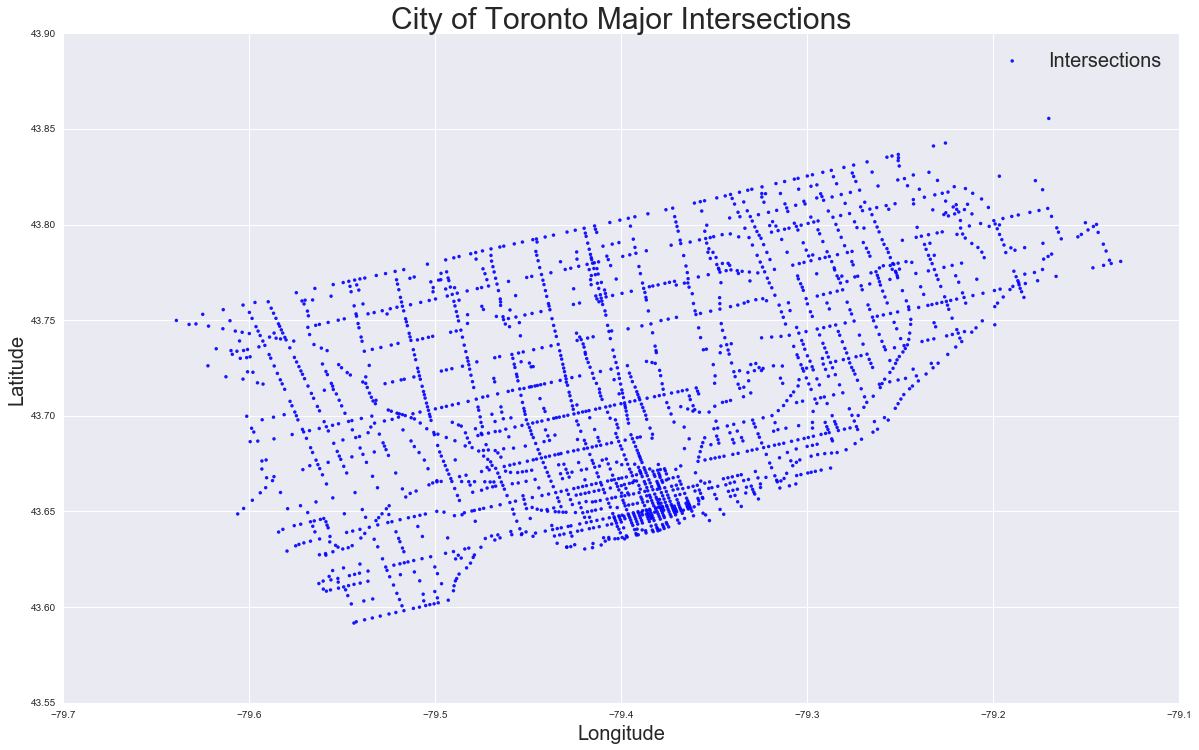

In [34]:
# plot intersection using their geographic coordinates
fig, ax = plt.subplots(figsize=[20, 12])
intersection_scatter = ax.scatter(intersection_ped_df['longitude'], intersection_ped_df['latitude'], c='b', edgecolor='None', alpha=0.9, s=12)
ax.set_title('City of Toronto Major Intersections', fontsize = 30)
ax.set_xlabel('Longitude', fontsize=20)
ax.set_ylabel('Latitude', fontsize =20)
ax.legend([intersection_scatter], ['Intersections'], loc='upper right', fontsize = 20)
plt.show()

From the graph, we can see the shape of City of Toronto and some of the main streets.

In [35]:
### Plot intersections on interactive Map
intersection_map = folium.Map(location = [43.6532, -79.3832])
intersection_map.save('intersections.html')
marker_cluster_intersection = folium.MarkerCluster().add_to(intersection_map)
for index, row in intersection_ped_df.iterrows():
    folium.Marker([row["latitude"],row["longitude"]] ).add_to(marker_cluster_intersection )
intersection_map.save('intersections.html')
intersection_map

The interactive map gives up more context about each intersection

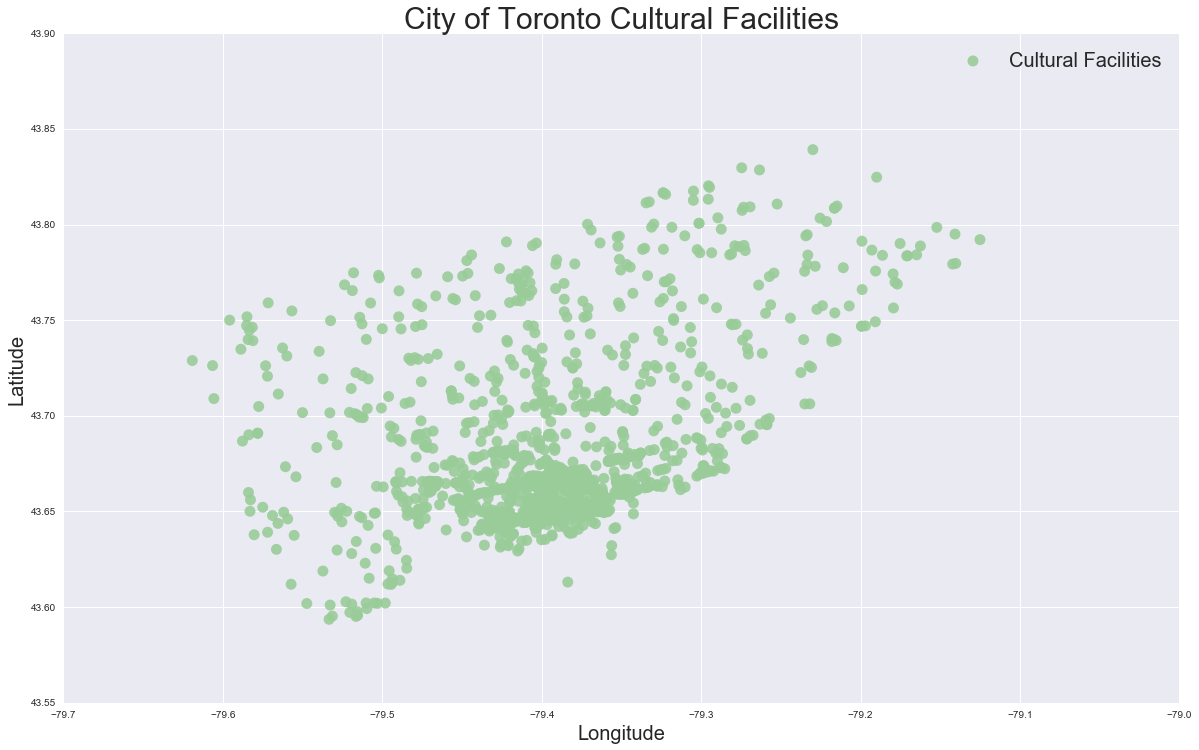

In [36]:
# plot Cultural facilities distribution based on
# geographic coordinates
fig, ax = plt.subplots(figsize=[20, 12])
facility_scatter = ax.scatter(facility_df['longitude'], facility_df['latitude'], 
                              c='#99cc99', edgecolor='None', alpha=0.9, s=120)
ax.set_title('City of Toronto Cultural Facilities', fontsize = 30)
ax.set_xlabel('Longitude', fontsize=20)
ax.set_ylabel('Latitude', fontsize =20)
ax.legend([facility_scatter], ['Cultural Facilities'], loc='upper right', fontsize = 20)
plt.show()

It is no surprise that cultural facilities are condensed in downtown area of City of Toronto.

### Plot Cultural Facilities on Interactive Map

In [37]:
facility_map = folium.Map(location = [43.6532, -79.3832])
facility_map.save('facilities.html')
marker_cluster_facility = folium.MarkerCluster().add_to(facility_map)
for index, row in facility_df.iterrows():
    folium.Marker([row["latitude"],row["longitude"]] ).add_to(marker_cluster_facility)
facility_map.save('facilities.html')
facility_map

### 3.2 Clustering Facilities Using DBSCAN Algorithm
<a id = '3.2'></a>

We first try [DBSCAN](http://scikit-learn.org/stable/modules/clustering.html#dbscan) algorithm in `scikit-learn` for clustering. DBSCAN is base on the paper:

* “A Density-Based Algorithm for Discovering Clusters in Large Spatial Databases with Noise” Ester, M., H. P. Kriegel, J. Sander, and X. Xu, In Proceedings of the 2nd International Conference on Knowledge Discovery and Data Mining, Portland, OR, AAAI Press, pp. 226–231. 1996

This algorithm is aimed for spatial data, which might be a good fit for our case.

The following is a description of DBSCAN algorithm from sklearn:

>The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped. The central component to the DBSCAN is the concept of core samples, which are samples that are in areas of high density. A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples). There are two parameters to the algorithm, `min_samples` and `eps`, which define formally what we mean when we say dense. Higher `min_samples` or lower `eps` indicate higher density necessary to form a cluster.

DBSCAN algorithm clusters dataset based on two parameters:

 * **eps** - The max distance between neighbour points to be considerted in a cluster

 *  **min_samples** - the minimum cluster size. If it is set to 1, it means every data point will be assigned to either a cluster or form its own cluster of 1 data point. If `min_sample` is set to be larger than one, then cluster with size less than min_sample will be considered as noise.

The scikit-learn DBSCAN haversine distance metric requires data in the form of [latitude, longitude] and both inputs and outputs are in units of radians.

**Reference**  
[Clustering to Reduce Spatial Data Set Size](http://geoffboeing.com/2014/08/clustering-to-reduce-spatial-data-set-size/)


#### Choose Parameters for DBSCAN clustering algorithm

Since in our facility dataset, we need to consider all facilities, we don't want any of them to be classified as noise, so we set `min_samples`=1. Now our clustering will depend on a proper `eps` value.

Let's try esp = 1.5, 1.0, 0.7 (km)

Note that `eps` need to be converted to radians for use by harversine

In [38]:
# define the number of kilometers in one radiation
# which will be used to convert esp from km to radiation
kms_per_rad = 6371.0088

In [39]:
# define a function to calculate the geographic coordinate 
# centroid of a cluster of geographic points
# it will be used later to calculate the centroids of DBSCAN cluster
# because Scikit-learn DBSCAN cluster algorithm does not calculate centroid
def get_centroid(cluster):
  """calculate the centroid of a cluster of geographic coordinate points
  Args:
    cluster: cluster coordinates, nx2 array-like (array, list of lists, etc) 
    n is the number of coordinate points(latitude, longitude)in the cluster.
  Return:
    centroid: numpy array, geometry centroid of the cluster
    
  """
  cluster_ary = np.asarray(cluster)
  centroid = cluster_ary.mean(axis = 0)
  return centroid

# testing get_centroid function
test_cluster= [[ 43.70487299, -79.57753802], 
               [ 43.71138367, -79.56524418],
               [ 43.72616079, -79.57319998],
               [ 43.73547907, -79.56258364],
               [ 43.72070325, -79.57202018],
               [ 43.73126031, -79.5598719 ]]
test_centroid = get_centroid(test_cluster)
print test_centroid
print type(test_centroid)

[ 43.72164335 -79.56840965]
<type 'numpy.ndarray'>


#### 3.2.1 DBSCAN Clustering with eps = 1.5

In [40]:
# convert eps to radians for use by haversine
epsilon = 1.5/kms_per_rad

# Extract intersection coordinates (latitude, longitude)
fac_coords = facility_df.as_matrix(columns = ['latitude', 'longitude'])

start_time = time.time()
dbsc = (DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine')
        .fit(np.radians(fac_coords)))
fac_cluster_labels = dbsc.labels_

# get the number of clusters
num_clusters = len(set(dbsc.labels_))

# print the outcome
message = 'Clustered {:,} points down to {:,} clusters, for {:.1f}% compression in {:,.2f} seconds'
print(message.format(len(facility_df), num_clusters, 100*(1 - float(num_clusters) / len(facility_df)), time.time()-start_time))
print('Silhouette coefficient: {:0.03f}'.format(metrics.silhouette_score(fac_coords, fac_cluster_labels)))

# turn the clusters into a pandas series,where each element is a cluster of points
dbsc_clusters = pd.Series([fac_coords[fac_cluster_labels==n] for n in range(num_clusters)])

Clustered 1,397 points down to 20 clusters, for 98.6% compression in 0.27 seconds
Silhouette coefficient: -0.165


In [41]:
# get centroid of each cluster
fac_centroids = dbsc_clusters.map(get_centroid)
# unzip the list of centroid points (lat, lon) tuples into separate lat and lon lists
cent_lats, cent_lons = zip(*fac_centroids)
# from these lats/lons create a new df of one representative point for eac cluster
centroids_df = pd.DataFrame({'longitude':cent_lons, 'latitude':cent_lats})

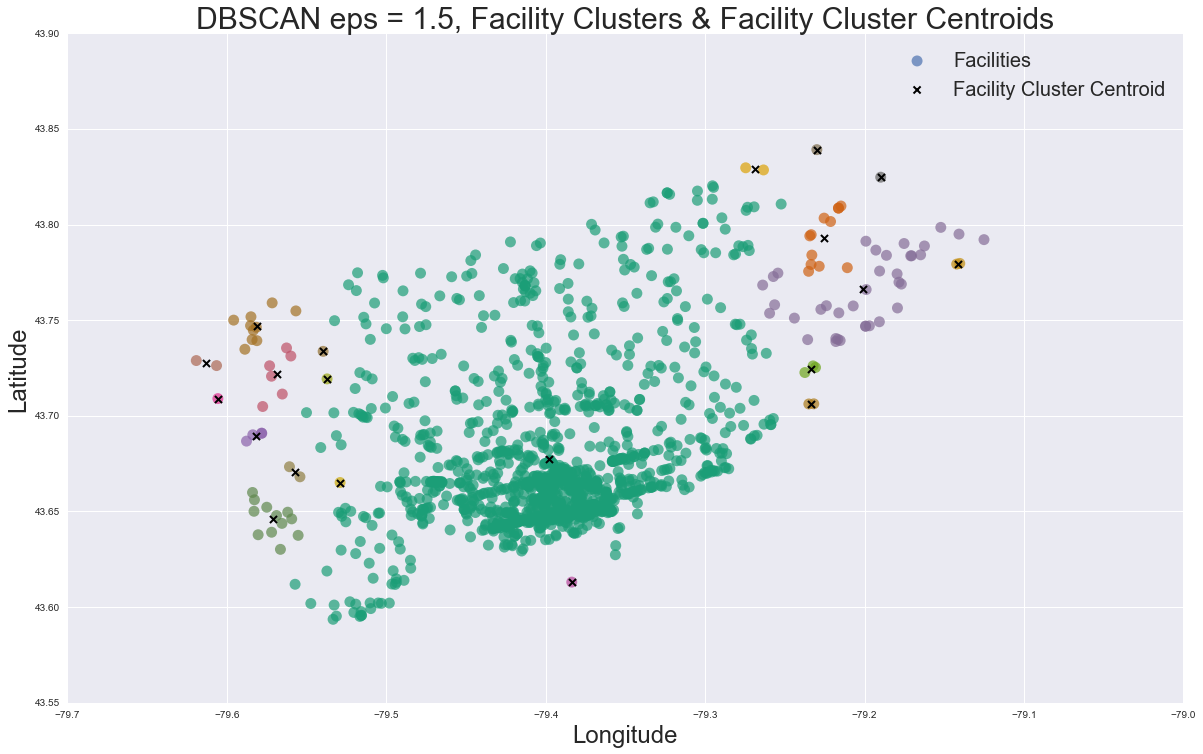

In [42]:
# Plot the facility clusters and cluster centroid
fig, ax = plt.subplots(figsize=[20, 12])
facility_scatter = ax.scatter(facility_df['longitude'], facility_df['latitude'], 
                              c=fac_cluster_labels, cmap = cm.Dark2, 
                              edgecolor='None', alpha=0.7, s=120)
centroid_scatter = ax.scatter(centroids_df['longitude'], centroids_df['latitude'], 
                              marker='x', linewidths=2, c='k', s=50)
ax.set_title('DBSCAN eps = 1.5, Facility Clusters & Facility Cluster Centroids', fontsize = 30)
ax.set_xlabel('Longitude', fontsize=24)
ax.set_ylabel('Latitude', fontsize = 24)
ax.legend([facility_scatter, centroid_scatter],
          ['Facilities', 'Facility Cluster Centroid'], 
          loc='upper right', fontsize = 20)
plt.show()

As we can see when we set eps = 1.5, the DBSCAN algorithm divided the facilities into 20 clusters.

#### 3.2.2 DBSCAN Clustering with eps = 0.7

In [43]:
# convert eps to radians for use by haversine
epsilon = 0.7/kms_per_rad

# Extract intersection coordinates (latitude, longitude)
fac_coords = facility_df.as_matrix(columns = ['latitude', 'longitude'])

start_time = time.time()
dbsc = (DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine')
        .fit(np.radians(fac_coords)))
fac_cluster_labels = dbsc.labels_

# get the number of clusters
num_clusters = len(set(dbsc.labels_))

# print the outcome
message = 'Clustered {:,} points down to {:,} clusters, for {:.1f}% compression in {:,.2f} seconds'
print(message.format(len(facility_df), num_clusters, 100*(1 - float(num_clusters) / len(facility_df)), time.time()-start_time))
print('Silhouette coefficient: {:0.03f}'.format(metrics.silhouette_score(fac_coords, fac_cluster_labels)))

# turn the clusters into a pandas series,where each element is a cluster of points
dbsc_clusters = pd.Series([fac_coords[fac_cluster_labels==n] for n in range(num_clusters)])

Clustered 1,397 points down to 185 clusters, for 86.8% compression in 0.05 seconds
Silhouette coefficient: 0.004


In [44]:
# get centroid of each cluster
fac_centroids = dbsc_clusters.map(get_centroid)
# unzip the list of centroid points (lat, lon) tuples into separate lat and lon lists
cent_lats, cent_lons = zip(*fac_centroids)
# from these lats/lons create a new df of one representative point for eac cluster
centroids_df = pd.DataFrame({'longitude':cent_lons, 'latitude':cent_lats})

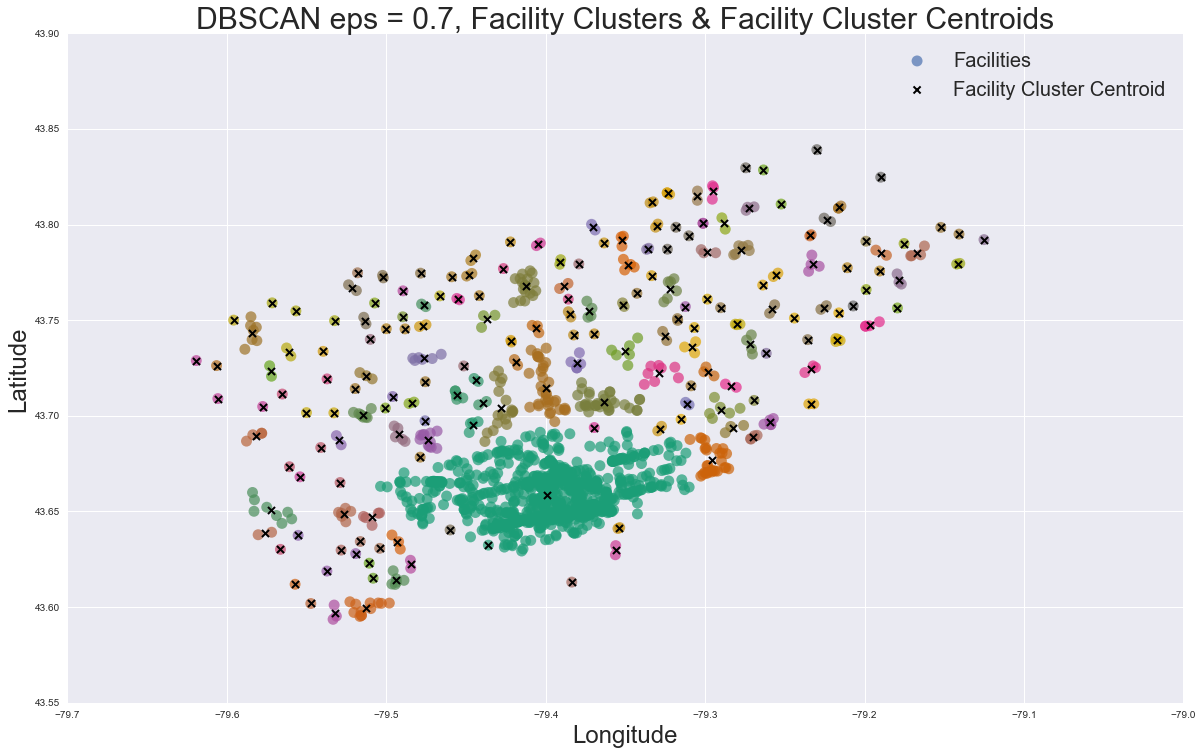

In [45]:
# Plot the facility clusters and cluster centroid
fig, ax = plt.subplots(figsize=[20, 12])
facility_scatter = ax.scatter(facility_df['longitude'], facility_df['latitude'],
                              c=fac_cluster_labels, cmap = cm.Dark2, edgecolor='None', alpha=0.7, s=120)
centroid_scatter = ax.scatter(centroids_df['longitude'], centroids_df['latitude'],
                              marker='x', linewidths=2, c='k', s=50)
ax.set_title('DBSCAN eps = 0.7, Facility Clusters & Facility Cluster Centroids', fontsize = 30)
ax.set_xlabel('Longitude', fontsize=24)
ax.set_ylabel('Latitude', fontsize = 24)
ax.legend([facility_scatter, centroid_scatter], ['Facilities', 'Facility Cluster Centroid'],
          loc='upper right', fontsize = 20)
plt.show()

When we set eps = 0.7, the DBSCAN algorithm divided the facilities into 185 clusters.

#### 3.2.3 DBSCAN Clustering with eps = 1.0 km

In [46]:
# convert eps to radians for use by haversine
epsilon = 1.0/kms_per_rad

# Extract intersection coordinates (latitude, longitude)
fac_coords = facility_df.as_matrix(columns = ['latitude', 'longitude'])

start_time = time.time()
dbsc = (DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine')
        .fit(np.radians(fac_coords)))
fac_cluster_labels = dbsc.labels_

# get the number of clusters
num_clusters = len(set(dbsc.labels_))

# print the outcome
message = 'Clustered {:,} points down to {:,} clusters, for {:.1f}% compression in {:,.2f} seconds'
print(message.format(len(facility_df), num_clusters, 100*(1 - float(num_clusters) / len(facility_df)), time.time()-start_time))
print('Silhouette coefficient: {:0.03f}'.format(metrics.silhouette_score(fac_coords, fac_cluster_labels)))

# turn the clusters into a pandas series,where each element is a cluster of points
dbsc_clusters = pd.Series([fac_coords[fac_cluster_labels==n] for n in range(num_clusters)])

Clustered 1,397 points down to 93 clusters, for 93.3% compression in 0.06 seconds
Silhouette coefficient: -0.028


In [47]:
# get centroid of each cluster
fac_centroids = dbsc_clusters.map(get_centroid)
# unzip the list of centroid points (lat, lon) tuples into separate lat and lon lists
cent_lats, cent_lons = zip(*fac_centroids)
# from these lats/lons create a new df of one representative point for eac cluster
centroids_df = pd.DataFrame({'longitude':cent_lons, 'latitude':cent_lats})

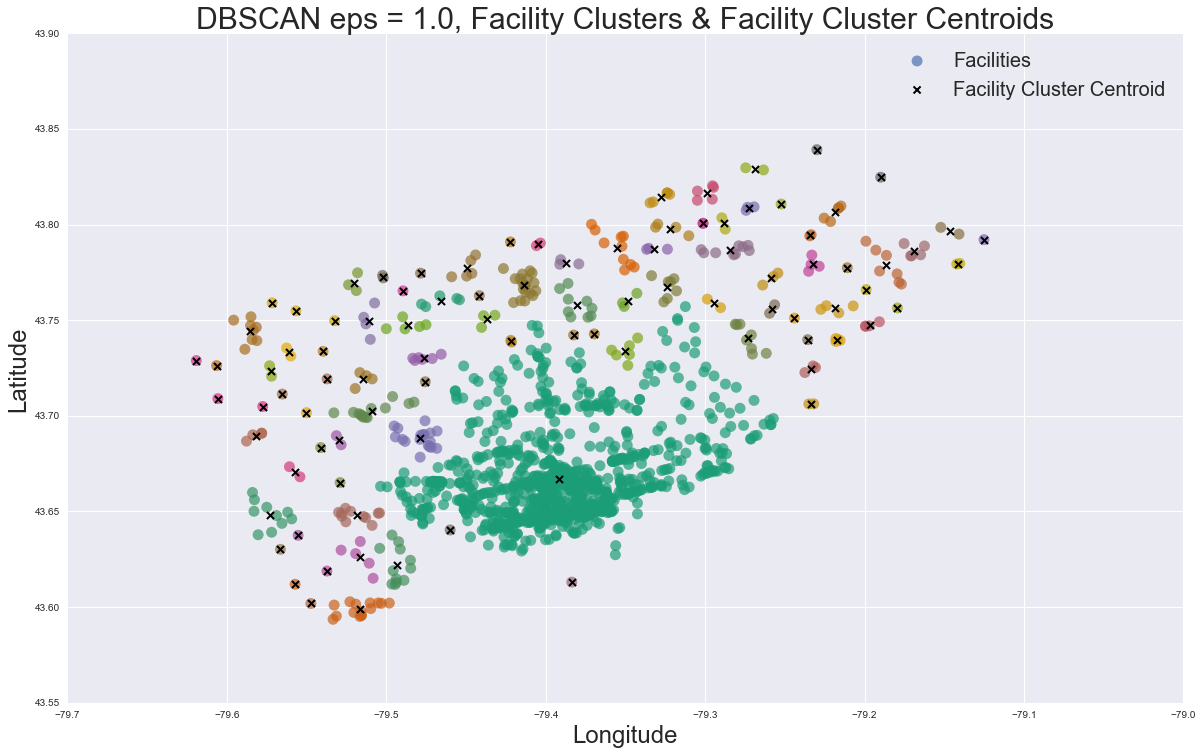

In [48]:
# Plot the facility clusters and cluster centroid
fig, ax = plt.subplots(figsize=[20, 12])
facility_scatter = ax.scatter(facility_df['longitude'], facility_df['latitude'],c=fac_cluster_labels,
                              cmap = cm.Dark2, edgecolor='None', alpha=0.7, s=120)
centroid_scatter = ax.scatter(centroids_df['longitude'], centroids_df['latitude'], 
                              marker='x', linewidths=2, c='k', s=50)
ax.set_title('DBSCAN eps = 1.0, Facility Clusters & Facility Cluster Centroids', fontsize = 30)
ax.set_xlabel('Longitude', fontsize=24)
ax.set_ylabel('Latitude', fontsize=24)
ax.legend([facility_scatter, centroid_scatter], ['Facilities', 'Facility Cluster Centroid'],
          loc='upper right', fontsize = 20)
plt.show()

eps = 1.0. the DBSCAN algorithm divided the facilities into 93 clusters.

### 3.3 Clustering Facilities Using KMeans Algorithm
<a id = '3.3'></a>

#### 3.3.1 KMeans Clustering with 200 Clusters

In [49]:
n_clusters = 200
fac_coords = facility_df.as_matrix(columns=['latitude', 'longitude'])
KM200_model = KMeans(n_clusters = n_clusters)
KM200_model.fit(fac_coords)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=200, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [50]:
# turn the clusters in to a pandas series, where each element is a cluster of points
KM200_clusters = pd.Series([fac_coords[KM200_model.labels_==n] for n in range(n_clusters )])

# centroids of 200 clusters
fac200_centroids = KM200_model.cluster_centers_

# Labels
KM200_label = KM200_model.labels_

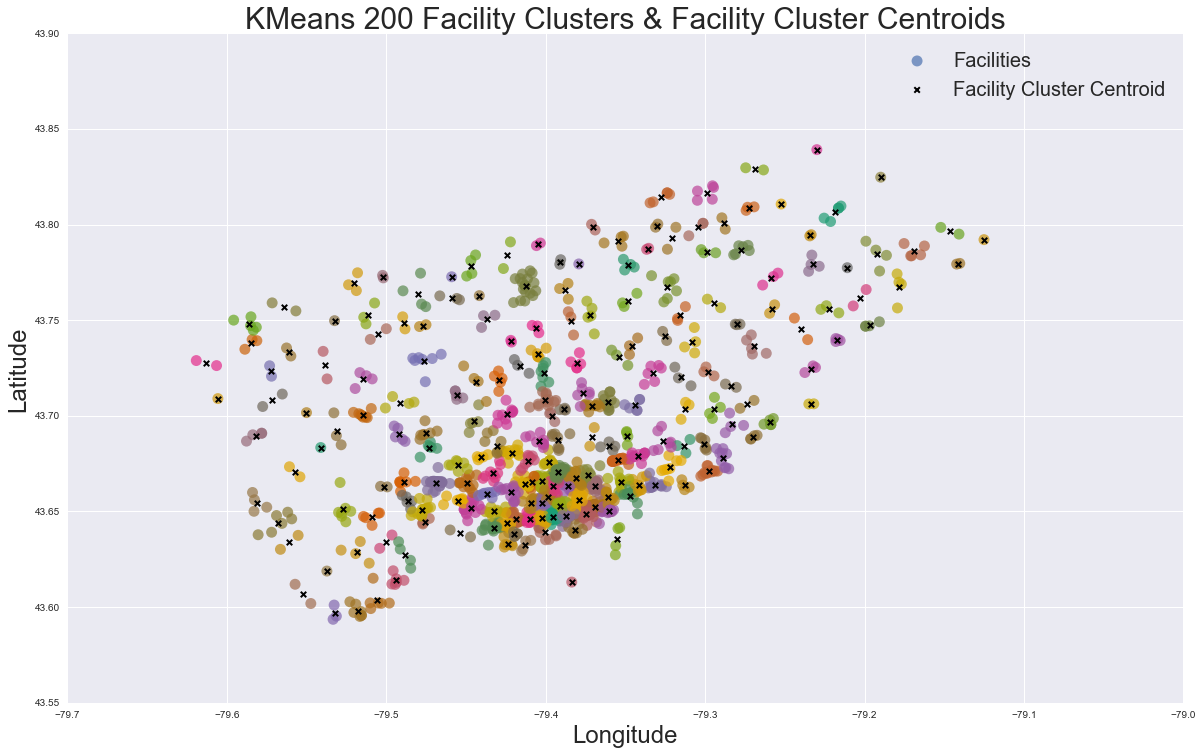

In [51]:
# Plot acility clusters and cluster centroid
fig, ax = plt.subplots(figsize=[20, 12])
facility_scatter = ax.scatter(facility_df['longitude'],  facility_df['latitude'], c=KM200_label,
                              cmap = cm.Dark2, edgecolor='None', alpha=0.7, s=120)
centroid_scatter = ax.scatter(fac200_centroids[:,1], fac200_centroids[:,0], marker='x', linewidths=2, c='k', s=30)
ax.set_title('KMeans 200 Facility Clusters & Facility Cluster Centroids', fontsize = 30)
ax.set_xlabel('Longitude', fontsize=24)
ax.set_ylabel('Latitude', fontsize = 24)
ax.legend([facility_scatter, centroid_scatter], ['Facilities', 'Facility Cluster Centroid'], loc='upper right', fontsize = 20)
plt.show()

In [52]:
# Add cluster labels to facility_df dataframe
labeled_KM200_facility_df = facility_df
labeled_KM200_facility_df = facility_df
labeled_KM200_facility_df['label'] = KM200_label
labeled_KM200_facility_df.head()

add_num         lf_name             address postal_cd     city           x            y  longitude   latitude                                fac_name ste_flr_un  performance  exhbvisart  scrn_based  library  multipurp  heritage        ownership  objectID  label
0    3465     Dundas St W    3465 Dundas St W   M6S 2S5  Toronto  305795.585  4835942.551 -79.487461  43.665434                            Club Hispano        NaN            1           1           0        0          0         0  Owned by others       191     28
1     181    Glenlake Ave    181 Glenlake Ave   M6P 4B6  Toronto  307834.850  4835127.684 -79.462181  43.658093                  Keele Community Centre        NaN            0           0           0        0          1         0       City Owned       194    143
2     288  Humberside Ave  288 Humberside Ave   M6P 1L5  Toronto  307268.847  4835411.316 -79.469196  43.660649  St. Johns West Toronto Anglican Church        NaN            1           0           0        0          1         0  Owned by others       195     53
3     238         Jane St         238 Jane St   M6S 3Z1  Toronto  305831.038  4834780.388 -79.487021  43.654964                    Art Works Art School        NaN            0           1           0        0          0         0  Owned by others       196    196
4      95     Lavinia Ave      95 Lavinia Ave   M6S 3H9  Toronto  306568.733  4833967.983 -79.477882  43.647658                Swansea Memorial Library        NaN            0           0           0        1          0         0       City Owned       199    134

In [53]:
labeled_KM200_facility_df.groupby('label').count()[['add_num', 'address']].describe()

add_num     address
count  200.000000  200.000000
mean     6.985000    6.985000
std      7.296642    7.296642
min      1.000000    1.000000
25%      2.000000    2.000000
50%      4.000000    4.000000
75%      9.000000    9.000000
max     48.000000   48.000000

The smallest cluster has 1 facility, the largest clusters contains 46 facilities

#### 3.3.2 KMeans Clustering with 300 Clusters

In [54]:
n_clusters = 300
fac_coords = facility_df.as_matrix(columns=['latitude', 'longitude'])
KM300_model = KMeans(n_clusters =n_clusters)
KM300_model.fit(fac_coords)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=300, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [55]:
# turn the clusters in to a pandas series, where each element is a cluster of points
KM300_clusters = pd.Series([fac_coords[KM300_model.labels_==n] for n in range(n_clusters )])

# centroids of 200 clusters
fac300_centroids = KM300_model.cluster_centers_

# Labels
KM300_label = KM300_model.labels_

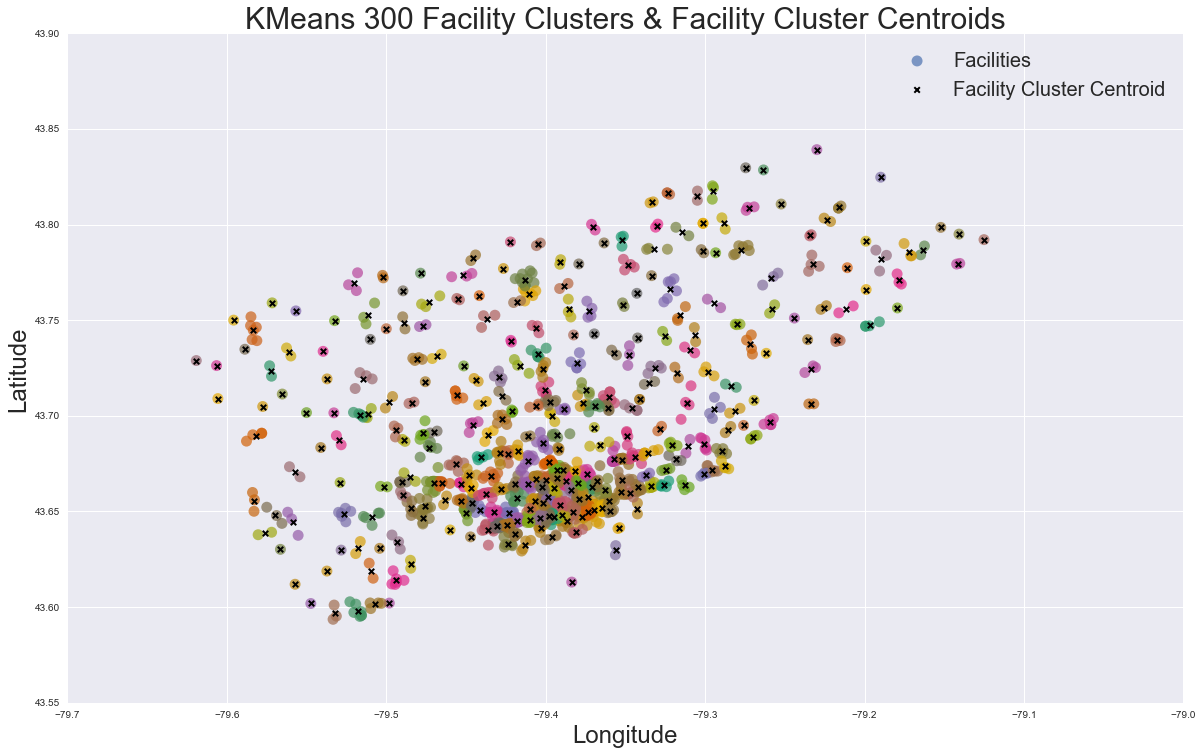

In [56]:
# Plot the facility clusters and cluster centroids
fig, ax = plt.subplots(figsize=[20, 12])
facility_scatter = ax.scatter(facility_df['longitude'],  facility_df['latitude'], c=KM300_label,
                              cmap = cm.Dark2, edgecolor='None', alpha=0.7, s=120)
centroid_scatter = ax.scatter(fac300_centroids[:,1], fac300_centroids[:,0], 
                              marker='x', linewidths=2, c='k', s=30)
ax.set_title('KMeans 300 Facility Clusters & Facility Cluster Centroids', fontsize = 30)
ax.set_xlabel('Longitude', fontsize=24)
ax.set_ylabel('Latitude', fontsize = 24)
ax.legend([facility_scatter, centroid_scatter],
          ['Facilities', 'Facility Cluster Centroid'],
          loc='upper right', fontsize = 20)
plt.show()

In [57]:
# Plot facilities and facility cluster centroids on interactive map
facility_centroid_map = folium.Map(location = [43.6532, -79.3832])
facility_centroid_map.save('facility_centroids.html')

# Add markers of facilities
facility_cluster = folium.MarkerCluster().add_to(facility_centroid_map)
for index, row in facility_df.iterrows():
    folium.Marker([row["latitude"],row["longitude"]] ).add_to(facility_cluster)    
    
# Add markers of clusters centroids
centroid_cluster = folium.MarkerCluster().add_to(facility_centroid_map)
for index, row in centroids_df.iterrows():
    folium.RegularPolygonMarker([row['latitude'], row['longitude']],
                 fill_color='#769d96', number_of_sides=8, radius=6, popup='cluster centroid').add_to(centroid_cluster)

facility_centroid_map.save('facility_centroids.html')
facility_centroid_map

In [58]:
# Add cluster labels to facility_df dataframe
labeled_KM300_facility_df = facility_df
labeled_KM300_facility_df = facility_df
labeled_KM300_facility_df['label'] = KM300_label
labeled_KM300_facility_df.head()

add_num         lf_name             address postal_cd     city           x            y  longitude   latitude                                fac_name ste_flr_un  performance  exhbvisart  scrn_based  library  multipurp  heritage        ownership  objectID  label
0    3465     Dundas St W    3465 Dundas St W   M6S 2S5  Toronto  305795.585  4835942.551 -79.487461  43.665434                            Club Hispano        NaN            1           1           0        0          0         0  Owned by others       191    285
1     181    Glenlake Ave    181 Glenlake Ave   M6P 4B6  Toronto  307834.850  4835127.684 -79.462181  43.658093                  Keele Community Centre        NaN            0           0           0        0          1         0       City Owned       194    239
2     288  Humberside Ave  288 Humberside Ave   M6P 1L5  Toronto  307268.847  4835411.316 -79.469196  43.660649  St. Johns West Toronto Anglican Church        NaN            1           0           0        0          1         0  Owned by others       195    164
3     238         Jane St         238 Jane St   M6S 3Z1  Toronto  305831.038  4834780.388 -79.487021  43.654964                    Art Works Art School        NaN            0           1           0        0          0         0  Owned by others       196    274
4      95     Lavinia Ave      95 Lavinia Ave   M6S 3H9  Toronto  306568.733  4833967.983 -79.477882  43.647658                Swansea Memorial Library        NaN            0           0           0        1          0         0       City Owned       199    157

In [59]:
labeled_KM300_facility_df.groupby('label').count()[['add_num', 'address']].describe()

add_num     address
count  300.000000  300.000000
mean     4.656667    4.656667
std      4.698835    4.698835
min      1.000000    1.000000
25%      2.000000    2.000000
50%      3.000000    3.000000
75%      6.000000    6.000000
max     35.000000   35.000000

The smallest cluster has 1 facility, the largest cluster has 43 facility

## 4. Map Placement Based on Facility Clustering
<a id = '4'></a>

Now we have 300 facilities clusters and their centroids, our goal is to find an appropriate intersection to place map for each facility cluster as shown in the following plot. 

We compared two cases:  
**Case 1**: Select the intersection that is closest to the centroid of a cluster  
**Case 2**: Select the 3 closest intersections to a the centroid of a cluster, then among the five the closest intersections, we select the one with the highest pedestrian volume.

**KDTree Algorithm**   
To find the closest intersection to a cluster centroid, we will use KDTree algorithm.

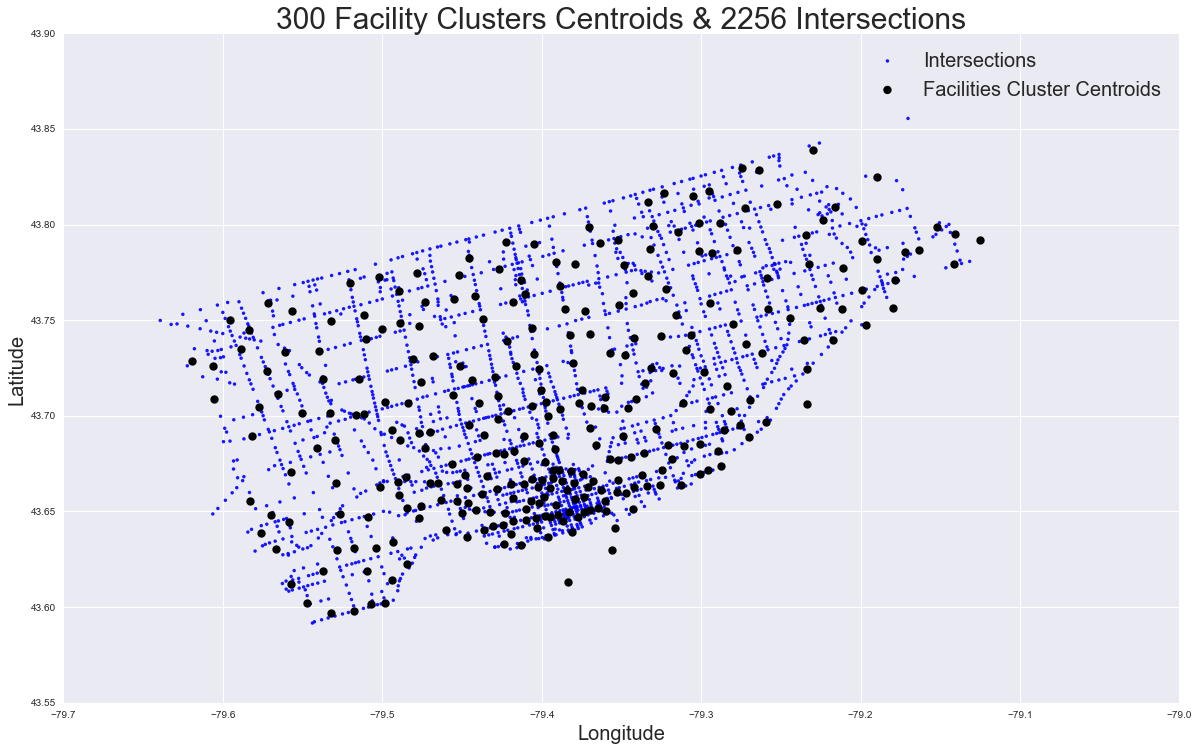

In [60]:
# plot facility cluster centroids and intersections
fig, ax = plt.subplots(figsize=[20, 12])
intersection_scatter = ax.scatter(intersection_ped_df['longitude'],
                                  intersection_ped_df['latitude'],
                                  c='b', edgecolor='None', alpha=0.9, s=12)
KM300_centroid_scatter = ax.scatter(fac300_centroids[:,1], fac300_centroids[:,0], 
                                    linewidths=2, c='k', s=40)
ax.set_title('300 Facility Clusters Centroids & 2256 Intersections', fontsize = 30)
ax.set_xlabel('Longitude', fontsize=20)
ax.set_ylabel('Latitude', fontsize =20)
ax.legend([intersection_scatter, KM300_centroid_scatter], 
          ['Intersections', 'Facilities Cluster Centroids'], loc='upper right', fontsize = 20)
plt.show()

The small blue dots represent intersections, the big black dots represent facility cluster centroids. Our goal now is to find the closet intersection for each cluster centroid.

### 4.1: Only Consider Distance
<a id = '4.1'></a>

In [61]:
intersection_coords = intersection_ped_df.as_matrix(columns=['latitude', 'longitude'])

# store index of cloest intersection to each cluster centroid
closest_intersection_index =[] 

# find the closest points using scipy KDTree algorithm
for i in range(len(fac300_centroids)):
    distance, index = spatial.KDTree(intersection_coords).query(fac300_centroids[i])
    closest_intersection_index.append(index)

# have a look at the index    
closest_intersection_index  

[766,
 1389,
 1448,
 272,
 1055,
 1783,
 55,
 429,
 1282,
 235,
 1952,
 1673,
 1300,
 680,
 338,
 1761,
 1567,
 587,
 1897,
 124,
 1032,
 2144,
 913,
 2080,
 157,
 329,
 1432,
 1733,
 1775,
 892,
 340,
 2192,
 554,
 436,
 325,
 1382,
 2026,
 1806,
 510,
 1346,
 1054,
 193,
 14,
 106,
 670,
 2156,
 870,
 772,
 1860,
 186,
 840,
 663,
 355,
 269,
 93,
 1007,
 2104,
 1643,
 645,
 1854,
 146,
 576,
 1805,
 1634,
 541,
 1819,
 954,
 1392,
 520,
 2170,
 2147,
 2097,
 1815,
 1192,
 1391,
 296,
 1102,
 36,
 2024,
 722,
 994,
 2089,
 2199,
 1758,
 652,
 1885,
 180,
 828,
 2058,
 756,
 1686,
 957,
 1712,
 1076,
 136,
 110,
 381,
 760,
 1821,
 319,
 553,
 1293,
 2127,
 1762,
 2236,
 1920,
 1963,
 349,
 2202,
 147,
 964,
 1918,
 1809,
 1071,
 995,
 2135,
 431,
 403,
 1387,
 361,
 188,
 1913,
 1296,
 121,
 2044,
 585,
 770,
 2161,
 2167,
 980,
 1132,
 513,
 1668,
 1451,
 666,
 343,
 480,
 1901,
 853,
 626,
 1880,
 1710,
 263,
 1943,
 1562,
 2205,
 1191,
 1528,
 1645,
 1084,
 2168,
 238,
 737,
 548,

In [62]:
len(closest_intersection_index)

300

In [63]:
# one intersection may be the closet to multiple cluster centroids
# especially in downtown where facilities are condensed.
len(set(closest_intersection_index))

298

In [64]:
map_intersection_index = list(set(closest_intersection_index))
len(map_intersection_index)

298

In [65]:
# selected intersections for map placement
map_intersection_df = intersection_ped_df.iloc[map_intersection_index]
map_intersection_df

PX               main midblock_route           side1_route      side2_route   latitude  longitude   8hr_vel_vol   8hr_ped_vol
1807  1825     EGLINTON AVE E            NaN           TORRANCE RD   PRIVATE ACCESS  43.739600 -79.235250   1102.000000  20519.000000
513    515  VICTORIA PARK AVE            NaN            SURREY AVE              NaN  43.736300 -79.307390  12052.000000   9270.500000
1451  1457             BAY ST            NaN          ST JOSEPH ST              NaN  43.665650 -79.387700   8042.500000   8613.000000
6        8          JARVIS ST            NaN           DUNDAS ST E              NaN  43.657052 -79.374531  11929.000000  13787.000000
2055  2108     LAWRENCE AVE W            NaN         BROOKHAVEN DR              NaN  43.704370 -79.496650   6415.000000   5882.000000
1032  1035        FINCH AVE E            NaN            WARDEN AVE              NaN  43.796830 -79.315760  16495.000000  16851.500000
2058  2111     LAWRENCE AVE E            NaN   BAYVIEW AVE NB RAMP   CHEDDINGTON PL  43.727429 -79.381836   4135.500000   4841.000000
631    634       DON MILLS RD            NaN        DUNCAN MILL RD  GRAYDON HALL DR  43.761755 -79.347221   1294.000000  23590.000000
770    773      ROYAL YORK RD            NaN            MIMICO AVE              NaN  43.612260 -79.496720   3616.000000   3547.000000
14      16          KING ST E            NaN             CHURCH ST              NaN  43.649916 -79.374409  11277.000000  13419.000000
1978  2024     ST CLAIR AVE W            NaN             MOULD AVE   PRIVATE ACCESS  43.668240 -79.487040    472.000000  10677.000000
686    689         WARDEN AVE            NaN         FIRVALLEY CRT              NaN  43.703690 -79.277480   4450.000000   4072.500000
154    156        KINGSTON RD            NaN            WARDEN AVE              NaN  43.687770 -79.270928   6854.500000   7618.000000
23      25         BLOOR ST E            NaN             CHURCH ST              NaN  43.671022 -79.383123  20764.000000  23480.000000
225    227        QUEENS PARK            NaN    QUEENS PARK CRES W              NaN  43.666059 -79.393178    576.000000  19428.000000
1562  1568     SHEPPARD AVE E            NaN            MALVERN ST     PROGRESS AVE  43.794680 -79.234910    604.000000  16692.000000
1181  1184    MORNINGSIDE AVE            NaN         CORONATION DR              NaN  43.761906 -79.183615   3682.000000   3684.500000
540    542        DUNDAS ST W            NaN           DENISON AVE              NaN  43.652040 -79.402270   4598.000000   9481.000000
541    543         QUEEN ST E            NaN         BROADVIEW AVE              NaN  43.658890 -79.349820   7268.500000   7913.500000
1054  1057         KENNEDY RD            NaN          BERTRAND AVE              NaN  43.737470 -79.270110   7426.500000   8091.500000
1567  1573        KINGSTON RD            NaN             LAWSON RD  OLD KINGSTON RD  43.784540 -79.168720    122.000000   7477.000000
2080  2134        DUFFERIN ST            NaN       SASKATCHEWAN RD              NaN  43.632631 -79.425127    287.000000   7822.000000
36      38           YONGE ST            NaN            CARLTON ST       COLLEGE ST  43.661369 -79.383094  21276.500000  25370.000000
549    551         QUEEN ST E            NaN             BEECH AVE              NaN  43.672690 -79.287560   2129.000000   9048.000000
551    553         QUEEN ST W            NaN            NIAGARA ST              NaN  43.646020 -79.409930   1231.000000   7820.000000
2089  2143          CHERRY ST            NaN      COMMISSIONERS ST              NaN  43.645257 -79.352682    517.000000   5622.000000
554    556         QUEEN ST W            NaN         DOVERCOURT RD              NaN  43.643510 -79.422400   5683.000000   5695.000000
43      45           YONGE ST            NaN       SHAFTESBURY AVE       ALCORN AVE  43.682023 -79.391574   8946.500000   9945.000000
557    560      THE QUEENSWAY            NaN     COLBORNE LODGE DR              NaN  43.639530 -79.459480    642.000000  1

In [66]:
# Check the pedestrian volume of the select 296 intersections
map_intersection_df['8hr_ped_vol'].describe()

count      298.000000
mean     11324.208110
std       6014.470753
min         23.000000
25%       7146.750000
50%      10124.000000
75%      14770.000000
max      39750.000000
Name: 8hr_ped_vol, dtype: float64

The average 8 hour pedestrian volume is 11246.8 for the select 296 intersections

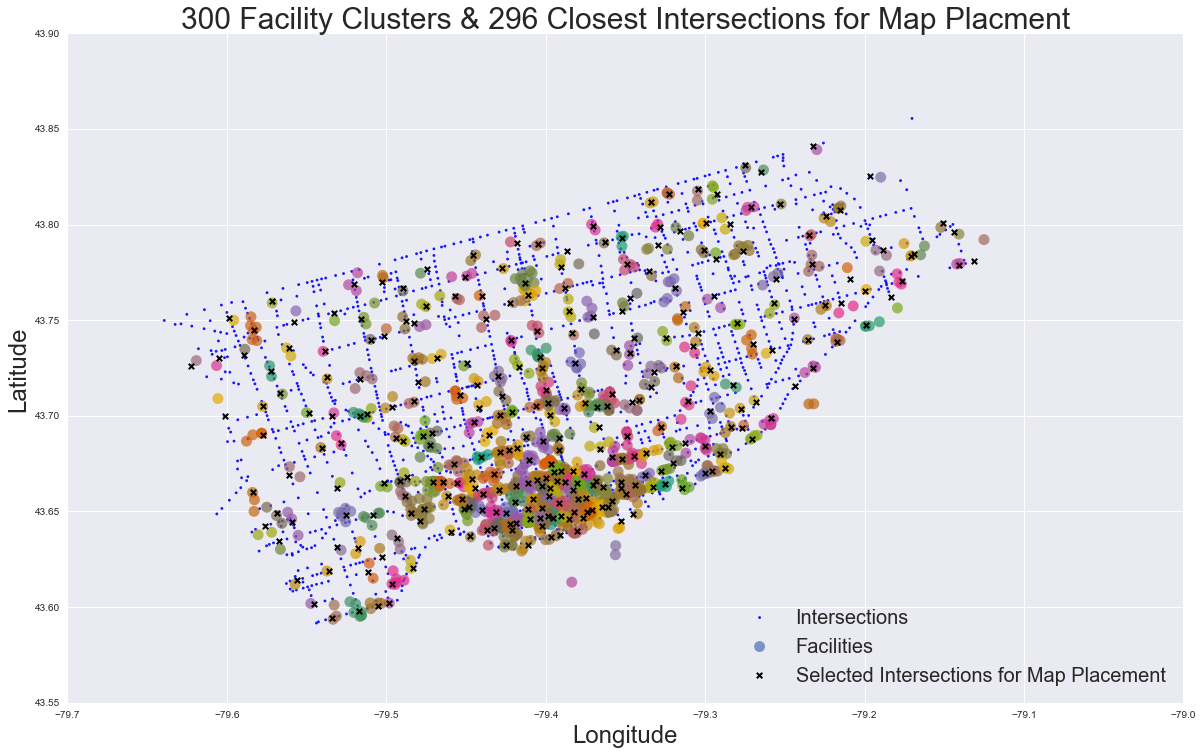

In [67]:
# Plot the selected 296 Intersections for Map Placement
fig, ax = plt.subplots(figsize=[20, 12])
intersection_scatter = ax.scatter(intersection_ped_df['longitude'],
                                  intersection_ped_df['latitude'],
                                  c='b', edgecolor='None', alpha=0.9, s=8)
facility_scatter = ax.scatter(facility_df['longitude'],  facility_df['latitude'], c=KM300_label,
                              cmap = cm.Dark2, edgecolor='None', alpha=0.7, s=120)
map_intersection_scatter = ax.scatter(map_intersection_df['longitude'],
                                      map_intersection_df['latitude'], 
                                      marker='x', linewidths=2, c='k', s=30)
ax.set_title('300 Facility Clusters & 296 Closest Intersections for Map Placment', fontsize = 30)
ax.set_xlabel('Longitude', fontsize=24)
ax.set_ylabel('Latitude', fontsize = 24)
ax.legend([intersection_scatter, facility_scatter, map_intersection_scatter], 
          ['Intersections', 'Facilities', 'Selected Intersections for Map Placement'], 
          loc='lower right', fontsize = 20)
plt.show()

###  4.2 Consider Both Distance and Pedestrian Volume
<a id = '4.2'></a>

In [68]:
# store index of cloest 3 intersections to each cluster centroid
cloest_intersection_index2 =[] 

# Find the closest 3 intersections using KDTree
for i in range(len(fac300_centroids)):
    distance, index = spatial.KDTree(intersection_coords).query(fac300_centroids[i], 3)
    cloest_intersection_index2.append(index)

# The returned index is a list of array
cloest_intersection_index2

[array([ 766, 1700,  486]),
 array([1389, 1262,  283]),
 array([1448, 1180, 1064]),
 array([272, 273, 271]),
 array([1055,  144, 1190]),
 array([1783, 2085, 2083]),
 array([55, 56, 54]),
 array([429, 578, 579]),
 array([1282,  471,  638]),
 array([235, 764, 236]),
 array([1952,  258,  257]),
 array([1673, 1548, 1576]),
 array([1300, 1685,  832]),
 array([680, 681, 169]),
 array([338, 336, 335]),
 array([1761, 1760, 2075]),
 array([1567, 1675, 2247]),
 array([587, 392, 961]),
 array([1897, 1288,   44]),
 array([ 124, 1787,  125]),
 array([1032, 1215, 2001]),
 array([2144,  880, 1013]),
 array([ 913, 1350,  623]),
 array([2080, 1953, 1443]),
 array([ 157, 1658, 1900]),
 array([ 329, 1676, 1473]),
 array([1432,  859, 1798]),
 array([1733, 1841,  813]),
 array([1775, 1688, 1378]),
 array([ 892, 2228, 1970]),
 array([340, 341, 475]),
 array([2192,  595,  854]),
 array([ 554, 2029, 1328]),
 array([436,  98, 503]),
 array([ 325, 1302, 1840]),
 array([1382, 1121,  453]),
 array([2026, 1996, 20

In [69]:
len(cloest_intersection_index2)

300

In [70]:
# create an empty dataframe with same schema as the intersection_ped_df
map_intersection_df2 = intersection_ped_df[intersection_ped_df['PX']<0]
map_intersection_df2

Empty DataFrame
Columns: [PX, main, midblock_route, side1_route, side2_route, latitude, longitude, 8hr_vel_vol, 8hr_ped_vol]
Index: []

In [71]:
print map_intersection_df2.columns
print map_intersection_df2.dtypes
print map_intersection_df2.empty

Index([u'PX', u'main', u'midblock_route', u'side1_route', u'side2_route', u'latitude', u'longitude', u'8hr_vel_vol', u'8hr_ped_vol'], dtype='object')
PX                  int64
main               object
midblock_route     object
side1_route        object
side2_route        object
latitude          float64
longitude         float64
8hr_vel_vol       float64
8hr_ped_vol       float64
dtype: object
True


In [72]:
for ary in cloest_intersection_index2:
    # five cloest intersection to a facility centroid
    temp_df = intersection_ped_df.iloc[ary]  
    # select the max pedestrian volume intersection
    # among the 3 cloest intersections
    max_ped_df = temp_df.ix[temp_df['8hr_ped_vol'].idxmax()]
    
    # appending the selected intersection row to map_intersection_df2
    map_intersection_df2 = map_intersection_df2.append(max_ped_df)

# 300 intersections, duplicates may exist
map_intersection_df2

PX               main midblock_route         side1_route                   side2_route   latitude  longitude   8hr_vel_vol   8hr_ped_vol
486    488        DUFFERIN ST            NaN      ST CLAIR AVE W                           NaN  43.677950 -79.443060  14866.000000  10850.000000
1262  1265        EASTERN AVE            NaN            KNOX AVE                           NaN  43.662540 -79.325230    404.000000  10111.000000
1180  1183        FINCH AVE E            NaN       AU LARGE BLVD                SENECA HILL DR  43.793650 -79.350420   9709.000000  27994.000000
271    273        SPADINA AVE            NaN           KING ST W                           NaN  43.645451 -79.395002  18498.000000  20677.000000
144    146        KINGSTON RD            NaN      GUILDWOOD PKWY                   CROMWELL RD  43.749649 -79.205992    258.000000  24763.000000
1783  1797        KIPLING AVE            NaN        GENTHORN AVE                PRIVATE ACCESS  43.723470 -79.572330   4689.500000   6409.500000
54      56           YONGE ST            NaN        RANLEIGH AVE                           NaN  43.727864 -79.402930   5040.000000  18308.000000
429    431          WESTON RD            NaN      LAWRENCE AVE W                           NaN  43.700140 -79.516240  11069.500000  11656.000000
638    641     ST CLAIR AVE E            NaN          HERRON AVE                PRIVATE ACCESS  43.710968 -79.285930   1010.000000  15404.000000
235    237  LAKE SHORE BLVD W            NaN         KIPLING AVE  COLONEL SAMUEL SMITH PARK DR  43.598158 -79.516936  11514.333333   6920.666667
257    259      SHERBOURNE ST            NaN        GERRARD ST E                           NaN  43.661228 -79.372218   2040.000000  15254.000000
1548  1554      STEELES AVE E            NaN      MIDDLEFIELD RD                           NaN  43.832740 -79.267940    711.000000  24186.000000
832    835         HARBORD ST            NaN            GRACE ST                           NaN  43.659960 -79.417470   1833.000000   9549.000000
169    171        BAYVIEW AVE            NaN         MILLWOOD RD                           NaN  43.704258 -79.374587   2599.000000  18168.000000
335    337         BLOOR ST W            NaN  PRINCE EDWARD DR N            PRINCE EDWARD DR S  43.648666 -79.505433   1187.000000  21167.000000
1760  1773          ALNESS ST            NaN     MARTIN ROSS AVE                           NaN  43.774280 -79.473370     76.000000  10105.000000
1567  1573        KINGSTON RD            NaN           LAWSON RD               OLD KINGSTON RD  43.784540 -79.168720    122.000000   7477.000000
587    590           KEELE ST            NaN          DONALD AVE                           NaN  43.684930 -79.472780   1070.000000  10579.000000
44      46           YONGE ST            NaN      ST CLAIR AVE E                ST CLAIR AVE W  43.688075 -79.394098  24060.750000  18858.250000
124    126           YONGE ST            NaN         EMPRESS AVE                 PARK HOME AVE  43.769295 -79.412931  12257.000000  17199.500000
1215  1218        FINCH AVE E            NaN    BRIDLETOWNE CRCL                           NaN  43.797550 -79.312320   1305.000000  22412.000000
880    883        DUNDAS ST W            NaN          NEILSON DR                WEST MALL CRES  43.627380 -79.562370  15983.500000  14006.000000
623    626       DON MILLS RD            NaN       YORK MILLS RD                           NaN  43.755793 -79.347046   4197.000000  40868.000000
2080  2134        DUFFERIN ST            NaN     SASKATCHEWAN RD                           NaN  43.632631 -79.425127    287.000000   7822.000000
1658  1669        KINGSTON RD            NaN      SCARBOROUGH RD                           NaN  43.680560 -79.287050   1624.000000  15979.000000
329    331         BLOOR ST W            NaN        RUNNYMEDE RD                           NaN  43.651148 -79.476227  11003.000000  15025.000000
859    862     SHEPPARD AVE E            NaN         MIDLAND AVE                           Na

In [73]:
# drop duplicates, and 289 unique intersections were selected 
# for map placement for the 300 facility clusters
map_intersection_df2 = map_intersection_df2.drop_duplicates()
map_intersection_df2

PX               main midblock_route         side1_route                   side2_route   latitude  longitude   8hr_vel_vol   8hr_ped_vol
486    488        DUFFERIN ST            NaN      ST CLAIR AVE W                           NaN  43.677950 -79.443060  14866.000000  10850.000000
1262  1265        EASTERN AVE            NaN            KNOX AVE                           NaN  43.662540 -79.325230    404.000000  10111.000000
1180  1183        FINCH AVE E            NaN       AU LARGE BLVD                SENECA HILL DR  43.793650 -79.350420   9709.000000  27994.000000
271    273        SPADINA AVE            NaN           KING ST W                           NaN  43.645451 -79.395002  18498.000000  20677.000000
144    146        KINGSTON RD            NaN      GUILDWOOD PKWY                   CROMWELL RD  43.749649 -79.205992    258.000000  24763.000000
1783  1797        KIPLING AVE            NaN        GENTHORN AVE                PRIVATE ACCESS  43.723470 -79.572330   4689.500000   6409.500000
54      56           YONGE ST            NaN        RANLEIGH AVE                           NaN  43.727864 -79.402930   5040.000000  18308.000000
429    431          WESTON RD            NaN      LAWRENCE AVE W                           NaN  43.700140 -79.516240  11069.500000  11656.000000
638    641     ST CLAIR AVE E            NaN          HERRON AVE                PRIVATE ACCESS  43.710968 -79.285930   1010.000000  15404.000000
235    237  LAKE SHORE BLVD W            NaN         KIPLING AVE  COLONEL SAMUEL SMITH PARK DR  43.598158 -79.516936  11514.333333   6920.666667
257    259      SHERBOURNE ST            NaN        GERRARD ST E                           NaN  43.661228 -79.372218   2040.000000  15254.000000
1548  1554      STEELES AVE E            NaN      MIDDLEFIELD RD                           NaN  43.832740 -79.267940    711.000000  24186.000000
832    835         HARBORD ST            NaN            GRACE ST                           NaN  43.659960 -79.417470   1833.000000   9549.000000
169    171        BAYVIEW AVE            NaN         MILLWOOD RD                           NaN  43.704258 -79.374587   2599.000000  18168.000000
335    337         BLOOR ST W            NaN  PRINCE EDWARD DR N            PRINCE EDWARD DR S  43.648666 -79.505433   1187.000000  21167.000000
1760  1773          ALNESS ST            NaN     MARTIN ROSS AVE                           NaN  43.774280 -79.473370     76.000000  10105.000000
1567  1573        KINGSTON RD            NaN           LAWSON RD               OLD KINGSTON RD  43.784540 -79.168720    122.000000   7477.000000
587    590           KEELE ST            NaN          DONALD AVE                           NaN  43.684930 -79.472780   1070.000000  10579.000000
44      46           YONGE ST            NaN      ST CLAIR AVE E                ST CLAIR AVE W  43.688075 -79.394098  24060.750000  18858.250000
124    126           YONGE ST            NaN         EMPRESS AVE                 PARK HOME AVE  43.769295 -79.412931  12257.000000  17199.500000
1215  1218        FINCH AVE E            NaN    BRIDLETOWNE CRCL                           NaN  43.797550 -79.312320   1305.000000  22412.000000
880    883        DUNDAS ST W            NaN          NEILSON DR                WEST MALL CRES  43.627380 -79.562370  15983.500000  14006.000000
623    626       DON MILLS RD            NaN       YORK MILLS RD                           NaN  43.755793 -79.347046   4197.000000  40868.000000
2080  2134        DUFFERIN ST            NaN     SASKATCHEWAN RD                           NaN  43.632631 -79.425127    287.000000   7822.000000
1658  1669        KINGSTON RD            NaN      SCARBOROUGH RD                           NaN  43.680560 -79.287050   1624.000000  15979.000000
329    331         BLOOR ST W            NaN        RUNNYMEDE RD                           NaN  43.651148 -79.476227  11003.000000  15025.000000
859    862     SHEPPARD AVE E            NaN         MIDLAND AVE                           Na

In [74]:
# Check the pedestrian volume of the select intersections
map_intersection_df2['8hr_ped_vol'].describe()

count      289.000000
mean     15847.160323
std       6746.279254
min       5654.000000
25%      11098.000000
50%      14775.000000
75%      19116.333333
max      40868.000000
Name: 8hr_ped_vol, dtype: float64

If we consider both distance and both pedestrian volume, the average 8 hour pedestrian volume is 16004.4 for the selected 286 intersections. In other words intersections selected by this method has in average 4758 more pedestrian volume or 42% pedestrian volume in 8 Hr period compare to the intersection selected by only considering distance. This is a huge difference. Therefore, we will select intersections using the second method, which considers both distance and pedestrian volume.

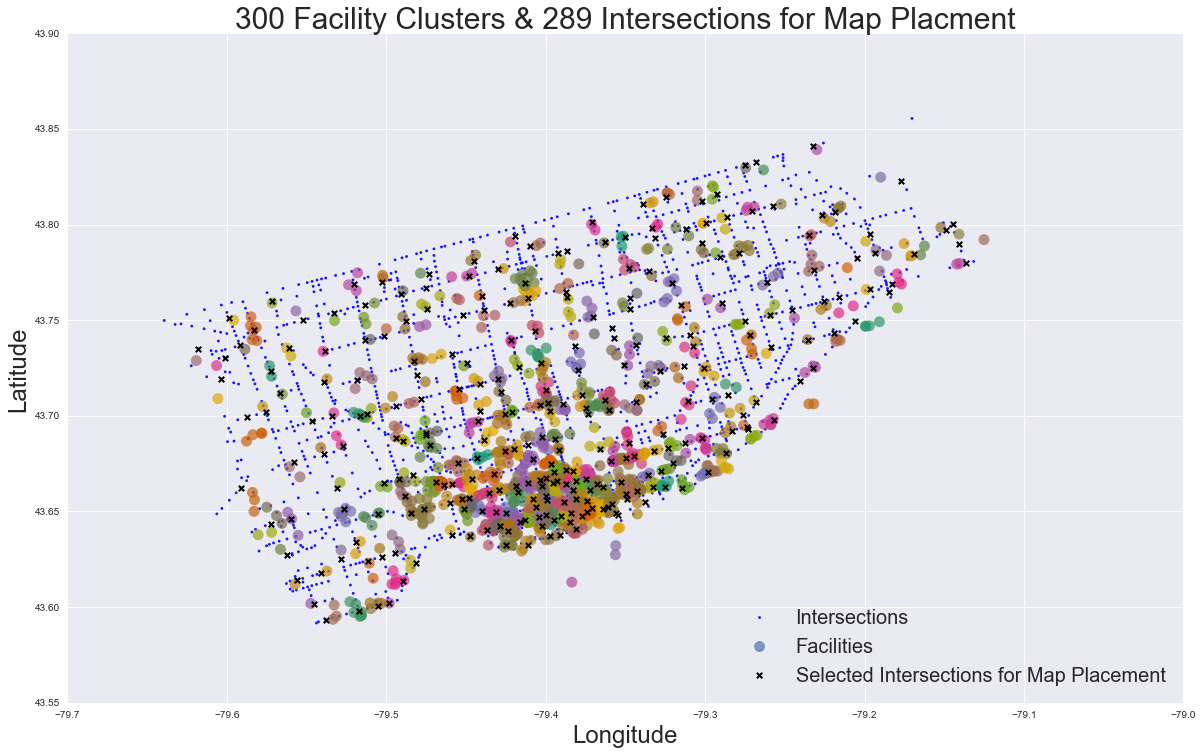

In [75]:
# Plot select 289 Intersections that for Map Placement
fig, ax = plt.subplots(figsize=[20, 12])
intersection_scatter = ax.scatter(intersection_ped_df['longitude'],
                                  intersection_ped_df['latitude'],
                                  c='b', edgecolor='None', alpha=0.9, s=8)
facility_scatter = ax.scatter(facility_df['longitude'],  facility_df['latitude'], c=KM300_label,
                              cmap = cm.Dark2, edgecolor='None', alpha=0.7, s=120)
map_intersection_scatter = ax.scatter(map_intersection_df2['longitude'],
                                      map_intersection_df2['latitude'], 
                                      marker='x', linewidths=2, c='k', s=30)
ax.set_title('300 Facility Clusters & 289 Intersections for Map Placment', fontsize = 30)
ax.set_xlabel('Longitude', fontsize=24)
ax.set_ylabel('Latitude', fontsize = 24)
ax.legend([intersection_scatter, facility_scatter, map_intersection_scatter], 
          ['Intersections', 'Facilities', 'Selected Intersections for Map Placement'], 
          loc='lower right', fontsize = 20)
plt.show()

In [76]:
# Plot selected intersection on interactive map
selected_intersection_map = folium.Map(location = [43.6532, -79.3832])
selected_intersection_map.save('selected_intersection.html')

# Add markers of facilities
intersection_cluster = folium.MarkerCluster().add_to(selected_intersection_map)
for index, row in map_intersection_df2.iterrows():
    folium.Marker([row["latitude"],row["longitude"]] ).add_to(intersection_cluster)    
    
selected_intersection_map

From this interactive map, we can see the final selected ~300 intersections for map placement, if we divide the 1397 cultural facilities into 300 clusters. 

## 5 Future Improvement
<a id = '5'></a>
There is a lot we can do to improve our current soltuion. 
1. Explore other methodologies. Clustering is only one of the possible methodolgies that may lead to a solution. We can also try other methodologies and compare the results. Formulating the problem as an optimization problem is a worth trying direction. Or we can combine clustering and optimization by applying optimization to each clusters.
2. Using more point of interest data. In our current study, we only used 1397 cultural facilities for building our solution. There is a lot more point of interest(such as hospitals, colleges or universities, attractions, commerical areas, etc.) we need to incorporate to make the study representative.
3. Consider more needs when choose an intersection for map placment. In our current study, we considered distance and pedestrian volume. Other needs we should consider include:
  * having high densities of visitors who are unfamiliar with the City
  * having changes in mode of travel
  * being on a main street
  * being in an area that is difficult to navigate
  * being close to hospitals, colleges or universities
  * being close to a city centre  
4. Insights from domain experts. City planners have more practical insights on whether an intersection is appropriate for map placement. We can improve our solution by taking advices from domain experts.